# Sentiment Analysis

In [ ]:
pip install sastrawi

In [ ]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

# Sastrawi Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install transformers

In [ ]:
df1 = pd.read_csv('dataset_mcd_tweet_id.csv')
df1

,username,tweet_id,text,url,replies,likes,retweets
0,@rikamulyasari16,1721431934944047324,Alhamdulillah hal yg dianggap remeh..hanya tid...,https://twitter.com/rikamulyasari16/status/172...,0,1,0
1,@dela_pino,1721087053876896198,Mereka yg membutuhkan uang kita\nSedangkan kit...,https://twitter.com/dela_pino/status/172108705...,1,1,0
2,@InfoKongsi,1721066948832973019,tetap boikot #BoycottMcDonalds @McDMalaysia #S...,https://twitter.com/InfoKongsi/status/17210669...,0,0,0
3,@Vanila_MistD,1721022836775743965,"Betul, tetap setoran royalti ke zionis\n\n#Boy...",https://twitter.com/Vanila_MistD/status/172102...,0,0,0
4,@bethorokollo,1720901486631326011,Semoga para karyawan mc d mendapatkan pekerjaa...,https://twitter.com/bethorokollo/status/172090...,0,0,0
...,...,...,...,...,...,...,...
131,@azrilnorrashid,494869351992795136,Dikatakan rm1 kita belanjakan di mcd bersamaan...,https://twitter.com/azrilnorrashid/status/4948...,0,0,0
132,@azrilnorrashid,494869060358656002,Td bpk gua ajk smua mkn ns arab sekali tutup l...,https://twitter.com/azrilnorrashid/status/4948...,1,0,0
133,@syahid_zul,494706557343391747,Lakukanlah ape pon yang kita mampu untuk memba...,https://twitter.com/syahid_zul/status/49470655...,1,0,0
134,@myhellomedia,487206778258874368,Mengapdet tentang #BoycottMcDonalds di facebook.,https://twitter.com/myhellomedia/status/487206...,0,0,0


In [ ]:
df2 = pd.read_csv('dataset_mcd_tweet_id2.csv')
df2

,username,tweet_id,text,url,replies,likes,retweets
0,@tvOneNews,1721384538071515535,"Seruan boikot mencuat, McDonald’s Indonesia ak...",https://twitter.com/tvOneNews/status/172138453...,153,201,38
1,@sales_yakult,1721401378042687572,btw terima kasih untuk bantuannya PT. Rekso Na...,https://twitter.com/sales_yakult/status/172140...,0,39,1
2,@eindro76,1721442796413079652,"maaf Saudara2ku di Palestine, hny dg cara boyc...",https://twitter.com/eindro76/status/1721442796...,0,16,1
3,@Gertak360,1721410943715049665,Ini hanya pengalihan isu\nTrik diskon itu hany...,https://twitter.com/Gertak360/status/172141094...,2,46,3
4,@PrabuSantoso1,1721412177800974683,Lanjut boikot \nWalau mengirim bantuan ke Pale...,https://twitter.com/PrabuSantoso1/status/17214...,0,45,1
...,...,...,...,...,...,...,...
96,@BANGKEHLOHnyet,1721398826509176884,"Lo bisnis di wilayah islam frontal, \nGanti na...",https://twitter.com/BANGKEHLOHnyet/status/1721...,1,0,0
97,@moshpito,1721408490336559360,go to hell with ur aid,https://twitter.com/moshpito/status/1721408490...,0,0,0
98,@lapetop1,1721387961525125420,#GenocideinGaza,https://twitter.com/lapetop1/status/1721387961...,0,0,0
99,@lapetop1,1721388208032727456,#GenocideinGaza,https://twitter.com/lapetop1/status/1721388208...,0,0,0


In [ ]:
df = pd.concat([df1,df2], ignore_index=True)
df

,username,tweet_id,text,url,replies,likes,retweets
0,@rikamulyasari16,1721431934944047324,Alhamdulillah hal yg dianggap remeh..hanya tid...,https://twitter.com/rikamulyasari16/status/172...,0,1,0
1,@dela_pino,1721087053876896198,Mereka yg membutuhkan uang kita\nSedangkan kit...,https://twitter.com/dela_pino/status/172108705...,1,1,0
2,@InfoKongsi,1721066948832973019,tetap boikot #BoycottMcDonalds @McDMalaysia #S...,https://twitter.com/InfoKongsi/status/17210669...,0,0,0
3,@Vanila_MistD,1721022836775743965,"Betul, tetap setoran royalti ke zionis\n\n#Boy...",https://twitter.com/Vanila_MistD/status/172102...,0,0,0
4,@bethorokollo,1720901486631326011,Semoga para karyawan mc d mendapatkan pekerjaa...,https://twitter.com/bethorokollo/status/172090...,0,0,0
...,...,...,...,...,...,...,...
232,@BANGKEHLOHnyet,1721398826509176884,"Lo bisnis di wilayah islam frontal, \nGanti na...",https://twitter.com/BANGKEHLOHnyet/status/1721...,1,0,0
233,@moshpito,1721408490336559360,go to hell with ur aid,https://twitter.com/moshpito/status/1721408490...,0,0,0
234,@lapetop1,1721387961525125420,#GenocideinGaza,https://twitter.com/lapetop1/status/1721387961...,0,0,0
235,@lapetop1,1721388208032727456,#GenocideinGaza,https://twitter.com/lapetop1/status/1721388208...,0,0,0


In [ ]:
# Function to preprocess a single tweet
def preprocess_tweet(tweet):
    # Remove punctuation and convert to lowercase
    tweet = tweet.lower()
    tweet = ''.join([char for char in tweet if char not in string.punctuation])

    # Tokenization and stemming using Sastrawi
    tokens = tweet.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stopwords.words('indonesian')]

    return ' '.join(stemmed_tokens)

In [ ]:
# Apply the preprocessing function to the "text_tweet" column
df['preprocessed_tweet'] = df['text'].apply(preprocess_tweet)
df

,username,tweet_id,text,url,replies,likes,retweets,preprocessed_tweet
0,@rikamulyasari16,1721431934944047324,Alhamdulillah hal yg dianggap remeh..hanya tid...,https://twitter.com/rikamulyasari16/status/172...,0,1,0,alhamdulillah yg anggap remehhanya beli produk...
1,@dela_pino,1721087053876896198,Mereka yg membutuhkan uang kita\nSedangkan kit...,https://twitter.com/dela_pino/status/172108705...,1,1,0,yg butuh uang tdk butuh produk yahudi boycottm...
2,@InfoKongsi,1721066948832973019,tetap boikot #BoycottMcDonalds @McDMalaysia #S...,https://twitter.com/InfoKongsi/status/17210669...,0,0,0,boikot boycottmcdonalds mcdmalaysia standwithp...
3,@Vanila_MistD,1721022836775743965,"Betul, tetap setoran royalti ke zionis\n\n#Boy...",https://twitter.com/Vanila_MistD/status/172102...,0,0,0,setor royalti zionis boycottmcdonalds
4,@bethorokollo,1720901486631326011,Semoga para karyawan mc d mendapatkan pekerjaa...,https://twitter.com/bethorokollo/status/172090...,0,0,0,moga karyawan mc d kerja boycottmcdonalds
...,...,...,...,...,...,...,...,...
232,@BANGKEHLOHnyet,1721398826509176884,"Lo bisnis di wilayah islam frontal, \nGanti na...",https://twitter.com/BANGKEHLOHnyet/status/1721...,1,0,0,lo bisnis wilayah islam frontal ganti nama jdi...
233,@moshpito,1721408490336559360,go to hell with ur aid,https://twitter.com/moshpito/status/1721408490...,0,0,0,go to hell with ur aid
234,@lapetop1,1721387961525125420,#GenocideinGaza,https://twitter.com/lapetop1/status/1721387961...,0,0,0,genocideingaza
235,@lapetop1,1721388208032727456,#GenocideinGaza,https://twitter.com/lapetop1/status/1721388208...,0,0,0,genocideingaza


In [ ]:
from transformers import pipeline

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# Define a function to predict sentiment and add results to separate columns
def predict_sentiment(text):
    results = distilled_student_sentiment_classifier(text)
    if results:
        # Find the result with the highest score
        max_result = max(results[0], key=lambda x: x['score'])
        sentiment_label = max_result['label']
        sentiment_score = max_result['score']
    else:
        sentiment_label = None
        sentiment_score = None
    return sentiment_label, sentiment_score

In [ ]:
# Apply the predict_sentiment function to the "preprocessed_tweet" column
df['sentiment_label'], df['sentiment_score'] = zip(*df['preprocessed_tweet'].apply(predict_sentiment))
df

,username,tweet_id,text,url,replies,likes,retweets,preprocessed_tweet,sentiment_label,sentiment_score
0,@rikamulyasari16,1721431934944047324,Alhamdulillah hal yg dianggap remeh..hanya tid...,https://twitter.com/rikamulyasari16/status/172...,0,1,0,alhamdulillah yg anggap remehhanya beli produk...,positive,0.698189
1,@dela_pino,1721087053876896198,Mereka yg membutuhkan uang kita\nSedangkan kit...,https://twitter.com/dela_pino/status/172108705...,1,1,0,yg butuh uang tdk butuh produk yahudi boycottm...,negative,0.453901
2,@InfoKongsi,1721066948832973019,tetap boikot #BoycottMcDonalds @McDMalaysia #S...,https://twitter.com/InfoKongsi/status/17210669...,0,0,0,boikot boycottmcdonalds mcdmalaysia standwithp...,negative,0.436656
3,@Vanila_MistD,1721022836775743965,"Betul, tetap setoran royalti ke zionis\n\n#Boy...",https://twitter.com/Vanila_MistD/status/172102...,0,0,0,setor royalti zionis boycottmcdonalds,negative,0.519895
4,@bethorokollo,1720901486631326011,Semoga para karyawan mc d mendapatkan pekerjaa...,https://twitter.com/bethorokollo/status/172090...,0,0,0,moga karyawan mc d kerja boycottmcdonalds,positive,0.430397
...,...,...,...,...,...,...,...,...,...,...
232,@BANGKEHLOHnyet,1721398826509176884,"Lo bisnis di wilayah islam frontal, \nGanti na...",https://twitter.com/BANGKEHLOHnyet/status/1721...,1,0,0,lo bisnis wilayah islam frontal ganti nama jdi...,negative,0.434986
233,@moshpito,1721408490336559360,go to hell with ur aid,https://twitter.com/moshpito/status/1721408490...,0,0,0,go to hell with ur aid,negative,0.428931
234,@lapetop1,1721387961525125420,#GenocideinGaza,https://twitter.com/lapetop1/status/1721387961...,0,0,0,genocideingaza,negative,0.701032
235,@lapetop1,1721388208032727456,#GenocideinGaza,https://twitter.com/lapetop1/status/1721388208...,0,0,0,genocideingaza,negative,0.701032


## Data Visualization

In [ ]:
label_data = pd.DataFrame(df.sentiment_label.value_counts()).reset_index()
label_data.rename(columns={'index': 'sentiment_label', 'sentiment_label':'count'}, inplace=True)
label_data

,sentiment_label,count
0,negative,139
1,positive,95
2,neutral,3


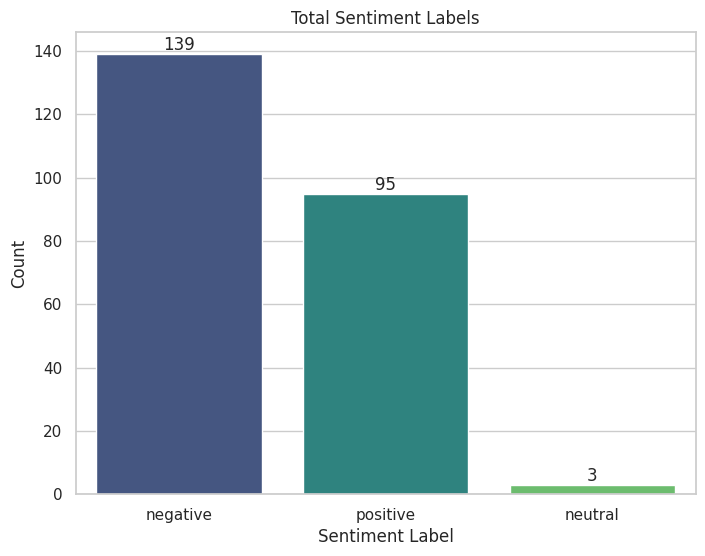

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x="sentiment_label", y="count", data=label_data, palette="viridis")
plt.title("Total Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")

# Add labels to the bars
for index, row in label_data.iterrows():
    plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.show()

## WordCloud

In [ ]:
negative_result_df = df[df['sentiment_label']=='negative'].reset_index(drop=True)
positive_result_df = df[df['sentiment_label']=='positive'].reset_index(drop=True)
neutral_result_df = df[df['sentiment_label']=='neutral'].reset_index(drop=True)

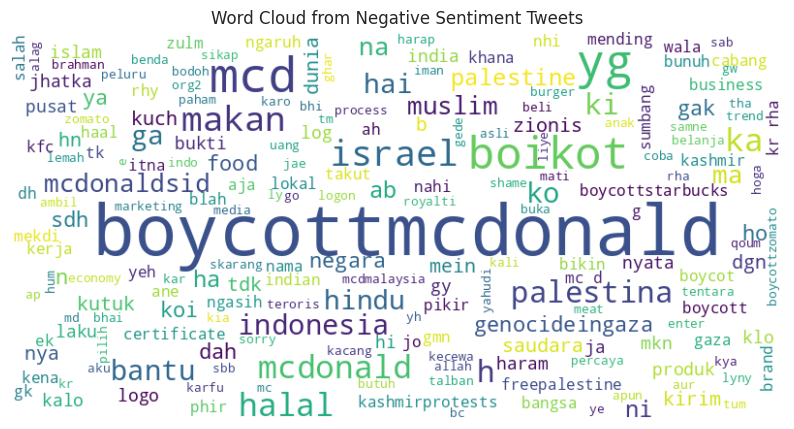

In [ ]:
# Join all preprocessed tweets into a single string
text_data = ' '.join(negative_result_df['preprocessed_tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Negative Sentiment Tweets")
plt.show()

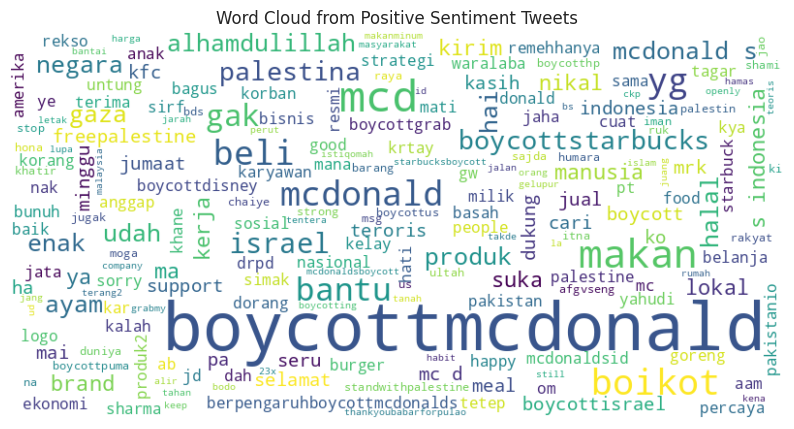

In [ ]:
# Join all preprocessed tweets into a single string
text_data = ' '.join(positive_result_df['preprocessed_tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Positive Sentiment Tweets")
plt.show()

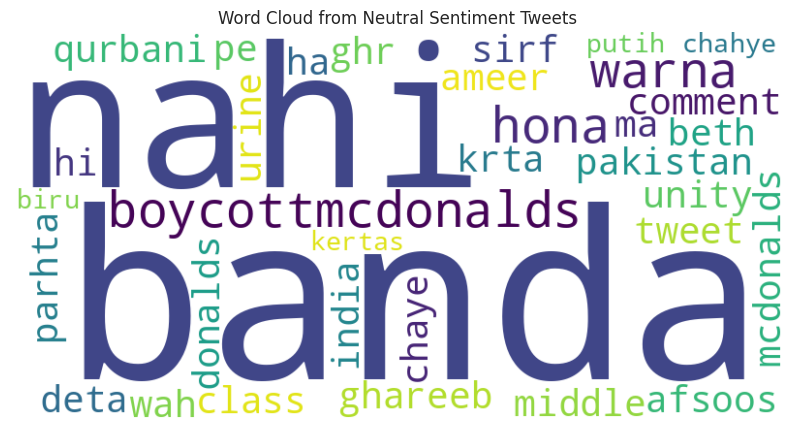

In [ ]:
# Join all preprocessed tweets into a single string
text_data = ' '.join(neutral_result_df['preprocessed_tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Neutral Sentiment Tweets")
plt.show()

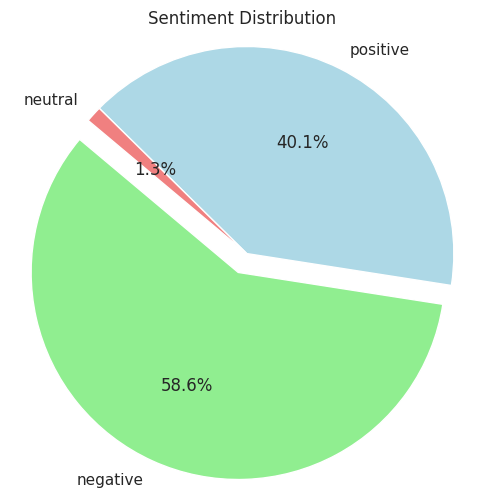

In [ ]:
# Create a Sentiment Pie Chart
plt.figure(figsize=(6, 6))
colors = ['lightgreen', 'lightblue', 'lightcoral']
explode = (0.1, 0, 0)  # Explode the 1st slice (positive)

plt.pie(label_data['count'], labels=label_data['sentiment_label'], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title("Sentiment Distribution")

plt.show()

## Emotion Classification

In [ ]:
from transformers import pipeline

emotion_classifier = pipeline("text-classification", model="thoriqfy/indobert-emotion-classification")


In [ ]:
# Define a function to predict emotion label and add results to separate columns
def predict_emotion(text):
    results = emotion_classifier(text)
    if results:
        emotion_label = results[0]['label']
        emotion_label_score = results[0]['score']
    else:
        emotion_label = None
        emotion_label_score = None
    return emotion_label, emotion_label_score

In [ ]:
# Apply the predict_emotion function to the "preprocessed_tweet" column
df['emotion_label'], df['emotion_label_score'] = zip(*df['preprocessed_tweet'].apply(predict_emotion))
df

,username,tweet_id,text,url,replies,likes,retweets,preprocessed_tweet,sentiment_label,sentiment_score,emotion_label,emotion_label_score
0,@rikamulyasari16,1721431934944047324,Alhamdulillah hal yg dianggap remeh..hanya tid...,https://twitter.com/rikamulyasari16/status/172...,0,1,0,alhamdulillah yg anggap remehhanya beli produk...,positive,0.698189,Neutral,0.799310
1,@dela_pino,1721087053876896198,Mereka yg membutuhkan uang kita\nSedangkan kit...,https://twitter.com/dela_pino/status/172108705...,1,1,0,yg butuh uang tdk butuh produk yahudi boycottm...,negative,0.453901,Neutral,0.992554
2,@InfoKongsi,1721066948832973019,tetap boikot #BoycottMcDonalds @McDMalaysia #S...,https://twitter.com/InfoKongsi/status/17210669...,0,0,0,boikot boycottmcdonalds mcdmalaysia standwithp...,negative,0.436656,Neutral,0.988418
3,@Vanila_MistD,1721022836775743965,"Betul, tetap setoran royalti ke zionis\n\n#Boy...",https://twitter.com/Vanila_MistD/status/172102...,0,0,0,setor royalti zionis boycottmcdonalds,negative,0.519895,Neutral,0.992371
4,@bethorokollo,1720901486631326011,Semoga para karyawan mc d mendapatkan pekerjaa...,https://twitter.com/bethorokollo/status/172090...,0,0,0,moga karyawan mc d kerja boycottmcdonalds,positive,0.430397,Neutral,0.855266
...,...,...,...,...,...,...,...,...,...,...,...,...
232,@BANGKEHLOHnyet,1721398826509176884,"Lo bisnis di wilayah islam frontal, \nGanti na...",https://twitter.com/BANGKEHLOHnyet/status/1721...,1,0,0,lo bisnis wilayah islam frontal ganti nama jdi...,negative,0.434986,Anger,0.995321
233,@moshpito,1721408490336559360,go to hell with ur aid,https://twitter.com/moshpito/status/1721408490...,0,0,0,go to hell with ur aid,negative,0.428931,Neutral,0.966515
234,@lapetop1,1721387961525125420,#GenocideinGaza,https://twitter.com/lapetop1/status/1721387961...,0,0,0,genocideingaza,negative,0.701032,Neutral,0.963031
235,@lapetop1,1721388208032727456,#GenocideinGaza,https://twitter.com/lapetop1/status/1721388208...,0,0,0,genocideingaza,negative,0.701032,Neutral,0.963031


In [ ]:
emotion_label_data = pd.DataFrame(df.emotion_label.value_counts()).reset_index()
emotion_label_data.rename(columns={'index': 'emotion_label', 'emotion_label':'count'}, inplace=True)
emotion_label_data

,emotion_label,count
0,Neutral,186
1,Anger,36
2,Happy,9
3,Fear,3
4,Sadness,2
5,Love,1


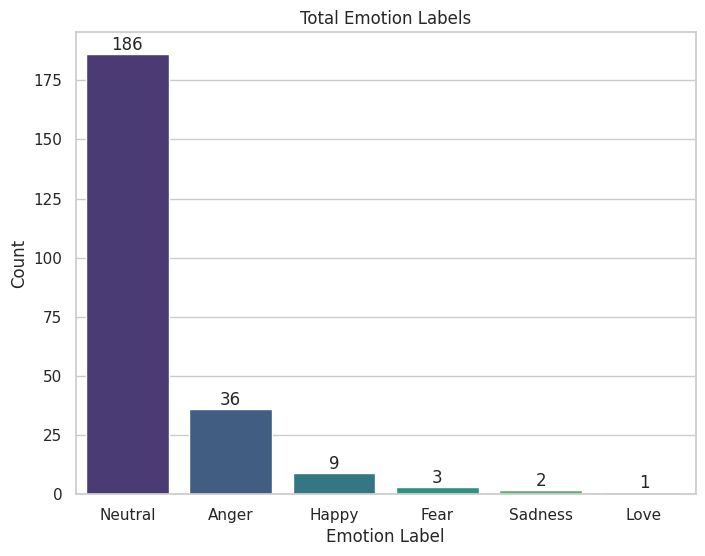

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x="emotion_label", y="count", data=emotion_label_data, palette="viridis")
plt.title("Total Emotion Labels")
plt.xlabel("Emotion Label")
plt.ylabel("Count")

# Add labels to the bars
for index, row in emotion_label_data.iterrows():
    plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

plt.show()

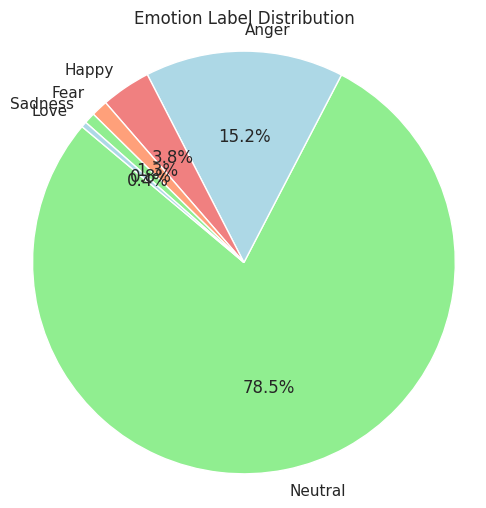

In [ ]:
# Create a Sentiment Pie Chart
plt.figure(figsize=(6, 6))
colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightsalmon']

plt.pie(emotion_label_data['count'], labels=emotion_label_data['emotion_label'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title("Emotion Label Distribution")

plt.show()
